w最初[ 1.  0. -1.]
w.shape [[[[ 1.  0. -1.]]]]


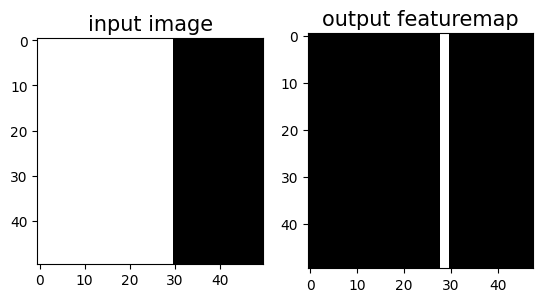

In [1]:
# 卷积CNN,

import matplotlib.pyplot as plt
import numpy as np
import paddle
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign
%matplotlib inline

# 创建初始化权重参数w
w = np.array([1,0,-1], dtype='float32')
print(f'w最初{w}')
# 将权重参数调整成维度为[cout, cin, kh, kw]
w = w.reshape([1,1,1,3])
print("w.shape",w)

# 创建卷积算子，设置输出通道数，卷积核大小和初始化权重参数
conv1 = Conv2D(in_channels=1, out_channels=1, kernel_size=[1,3],
               weight_attr=paddle.ParamAttr(
                   initializer=Assign(value=w)
               ))
# 创建输入图片
img = np.ones([50,50],dtype='float32')
img[:,30:] = 0.
# 调整图片nchw
x = img.reshape([1,1,50,50])
x = paddle.to_tensor(x)
y = conv1(x)
out = y.numpy()
f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(img, cmap='gray')
f = plt.subplot(122)
f.set_title('output featuremap', fontsize=15)
# 卷积算子Conv2D输出数据形状为[N, C, H, W]形式
# 此处N, C=1，输出数据形状为[1, 1, H, W]，是4维数组
# 但是画图函数plt.imshow画灰度图时，只接受2维数组
# 通过numpy.squeeze函数将大小为1的维度消除
plt.imshow(out.squeeze(), cmap='gray')
plt.show()


In [4]:
# 查看卷积层的权重参数名字和数值
print(conv1.weight)
# 参看卷积层的偏置参数名字和数值
print(conv1.bias)

Parameter containing:
Tensor(shape=[1, 1, 1, 3], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[[[ 1.,  0., -1.]]]])
Parameter containing:
Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [0.])


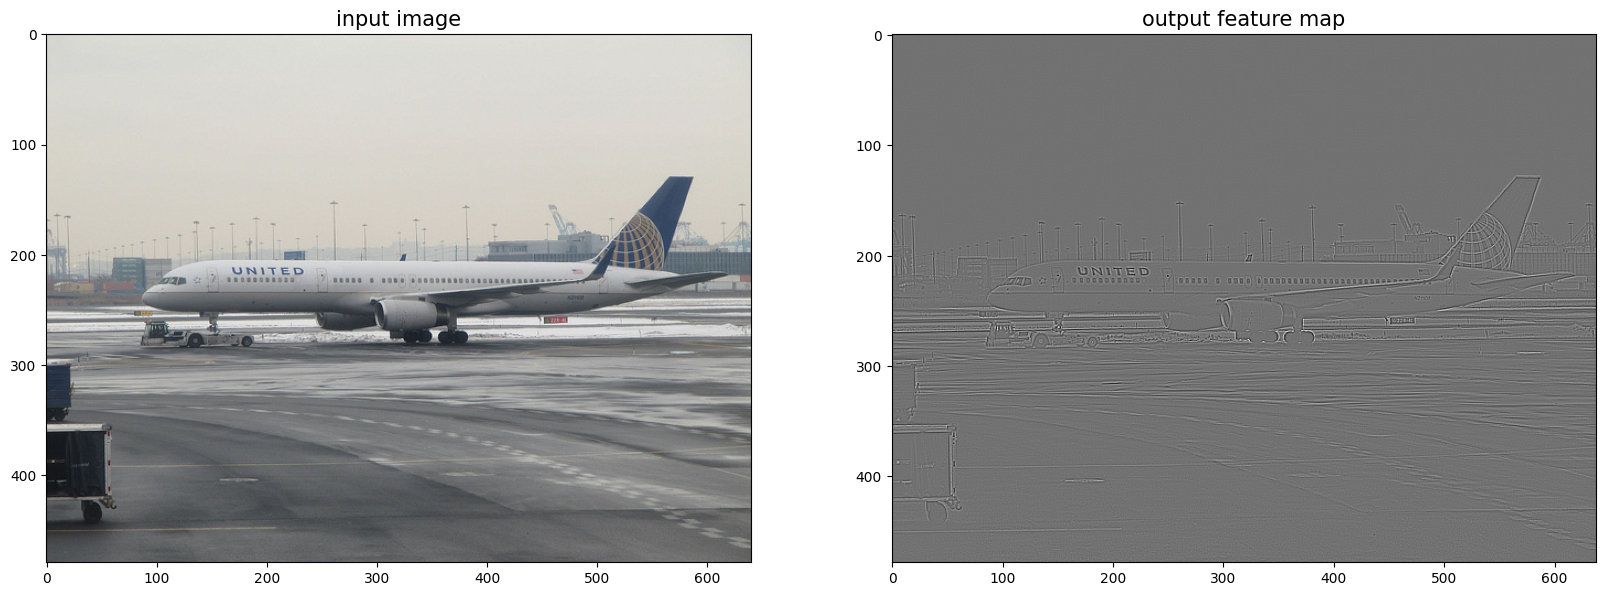

In [5]:

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import paddle
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign
img = Image.open('./000000098520.jpg')

# 设置卷积核参数
w = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],dtype='float32')/8
w = w.reshape([1,1,3,3])
w = np.repeat(w, 3, axis=1)
# 创建卷积算子
conv = Conv2D(in_channels=3, out_channels=1, kernel_size=[3,3],
              weight_attr=paddle.ParamAttr(
                  initializer=Assign(value=w)
              ))
x = np.array(img).astype('float32')
x = np.transpose(x, (2,0,1))

x = x.reshape(1,3,img.height, img.width)
x = paddle.to_tensor(x)
y = conv(x)

out = y.numpy()
plt.figure(figsize=(20, 10))
f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(img)
f = plt.subplot(122)
f.set_title('output feature map', fontsize=15)
plt.imshow(out.squeeze(), cmap='gray')
plt.show()


